# Introduction to Portfolio Construction and Analysis with Python
EDHEC Business School  
https://www.coursera.org/learn/introduction-portfolio-construction-python

## Optimal Asset Mix
- in principal, theory suggests that this allocation to the two building blocks should be decided as a function of Risk Aversion parameter, which we called gamma. More risk averse investors would invest more in liability hedging portfolios, and less risk averse investors would invest less in liability hedging portfolios, and more in performance seeking portfolios.
- In practice, asset owners tend to invest in performance-seeking assets. The maximum they can while not exceeding the risk budgets, so they just spend their entire risk budget, so has to generate the maximum upside potential possible. 

How can we succeed in generating upside performance while having only tight budgets?
1. can use a higher discount rate when discounting liability value. 
2. use higher risk premium assumptions when we simulate the performance of the risky assets
3. request a higher dollar contribution
4. relax the tightest budget
5. improve the performance seeking portfolio. 

Do a better job at harvesting that's going to translate into an improvement, of course of the situation from an asset liability management perspective. And that's why you should always do it.

## Simple Portfolio Allocation - Stock and Bond

In [1]:
import sys  
sys.path.append('../src') 
from edhec_risk_kit import *

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import edhec_risk_kit as erk

import matplotlib.pyplot as plt

DATA_FOLDER = '../data/'

%matplotlib inline

# %load_ext autoreload
# autoreload 2

## Monte Carlo Simulation of Coupon-Bearing Bonds using CIR

In [2]:
erk.bond_price(5, 100, 0.05, 12, 0.03)

0    109.275393
dtype: float64

In [3]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)

In [4]:
rates

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
1,0.028834,0.027996,0.031844,0.027395,0.026576,0.028785,0.030657,0.034379,0.027552,0.028086,...,0.029118,0.030104,0.030993,0.028870,0.026894,0.029434,0.031215,0.031088,0.029861,0.030348
2,0.033660,0.028768,0.029923,0.024778,0.029073,0.026737,0.031754,0.037975,0.025169,0.027220,...,0.026170,0.028954,0.029489,0.031538,0.023869,0.030255,0.032416,0.032285,0.027239,0.030012
3,0.035816,0.029004,0.029569,0.025667,0.026572,0.027788,0.031905,0.032061,0.025418,0.026035,...,0.028629,0.028660,0.031521,0.031182,0.024365,0.034553,0.030605,0.034500,0.033564,0.030709
4,0.035694,0.031267,0.027683,0.020772,0.025557,0.032522,0.028577,0.030761,0.025276,0.028283,...,0.027500,0.025250,0.031977,0.030707,0.022575,0.030430,0.027990,0.036064,0.036024,0.029418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.030167,0.003685,0.034103,0.010780,0.017100,0.092202,0.062058,0.005639,0.023004,0.019805,...,0.014071,0.003223,0.042298,0.008159,0.031246,0.028629,0.019436,0.098753,0.025474,0.066616
117,0.031681,0.004340,0.034418,0.008943,0.017302,0.087770,0.069965,0.007168,0.022060,0.017320,...,0.016238,0.003746,0.042714,0.011243,0.034184,0.028065,0.017791,0.095474,0.026740,0.064021
118,0.031783,0.004467,0.034183,0.006442,0.015781,0.094302,0.068156,0.007686,0.022403,0.018904,...,0.019383,0.003049,0.043532,0.011733,0.031761,0.029536,0.017474,0.091517,0.029257,0.064051
119,0.031087,0.004008,0.030992,0.006339,0.018036,0.084859,0.065885,0.004545,0.024397,0.020065,...,0.018813,0.001804,0.045139,0.011431,0.036125,0.033290,0.018694,0.093009,0.035380,0.065316


## Price of Bond

In [5]:
erk.bond_price(5,100,0.05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [6]:
erk.bond_price(5,100,0.05, 12, rates.iloc[1][[1,2,3]])

1    110.255729
2    108.381741
3    110.551325
dtype: float64

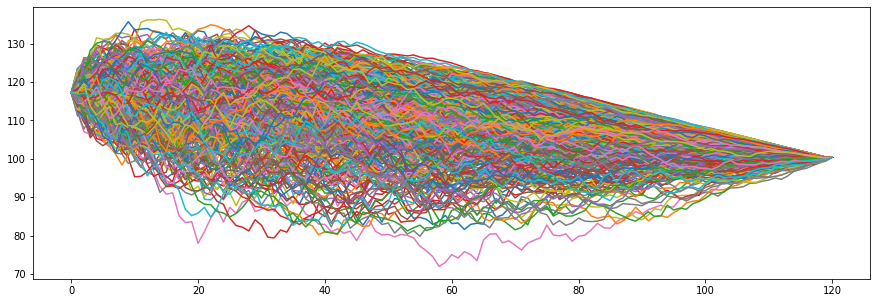

In [7]:
erk.bond_price(10, 100, 0.05, 12, rates).plot(legend=False, figsize=(15,5))
plt.show()

In [8]:
prices = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,119.035,115.421,119.61,120.401,118.283
2,118.166,117.085,121.992,117.879,120.096
3,117.813,117.288,120.969,120.103,118.952
4,115.611,118.909,125.577,120.916,114.48
...,...,...,...,...,...
116,101.543,100.526,101.304,101.093,98.6199
117,101.141,100.387,101.025,100.815,99.0694
118,100.758,100.262,100.725,100.569,99.2702
119,100.383,100.158,100.364,100.266,99.7115


## Price Return of Bond (excluding Coupons)

In [9]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

## Total Return of the Bond
- include coupon returns
- note that total return of bonds are affected by interest rates

In [10]:
p = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, 0.05, 12)
erk.annualize_rets(btr, 12)

1    0.027571
2    0.032090
3    0.029841
4    0.032846
dtype: float64

### Price of 10 and 30-Year bonds at the end of 10 years

In [16]:
price_10 = erk.bond_price(10, 100, 0.05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,101.543,100.526,101.304
117,101.141,100.387,101.025
118,100.758,100.262,100.725
119,100.383,100.158,100.364
120,100.417,100.417,100.417


In [14]:
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,190.719,123.29,171.584
117,188.499,122.699,176.02
118,187.793,123.025,182.353
119,188.734,128.393,182.312
120,185.355,127.433,184.263


## Experimenting across asset classes

### Bond Portfolio
- 60% of 10-Year Boond
- 40% of 10-Year Boond
- assuming rebalancing every month

In [17]:
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_bonds = 0.6*rets_10 + 0.4*rets_30

In [19]:
rets_bonds.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,0.0165187,0.0267929,-0.0190882,0.0342461,0.0445502,0.0171238,-0.00527163,-0.0476166,0.0322938,0.0256782,...,0.0130866,0.00126669,-0.00921075,0.0160899,0.0405234,0.00927614,-0.0118054,-0.0103162,0.00415518,-0.00162993
2,-0.0526613,-0.00684264,0.0256559,0.0344175,-0.0271498,0.027259,-0.0102889,-0.0376728,0.0314694,0.012767,...,0.0384527,0.0162733,0.0205837,-0.0286258,0.0395958,-0.00724284,-0.011412,-0.0113858,0.0343505,0.00651785
3,-0.0218022,-0.000389033,0.00668959,-0.0085806,0.0327535,-0.0102319,0.000875253,0.0743254,-0.000894199,0.0165891,...,-0.0266714,0.00590928,-0.0211656,0.00681362,-0.00398536,-0.0462867,0.0242263,-0.0227236,-0.0691629,-0.00567439
4,0.00439615,-0.0237824,0.0250693,0.0634753,0.0144388,-0.0515788,0.0426865,0.0180067,0.0038153,-0.0241799,...,0.0158786,0.0440128,-0.0026727,0.00819145,0.023935,0.0522513,0.0339684,-0.0149262,-0.0251048,0.0178805
5,0.00987755,0.027727,0.00386983,-0.0153748,0.0231578,0.0035879,-0.0158358,0.042435,-0.0331782,-0.00547722,...,0.0464555,-0.0530096,0.0183218,0.0178165,0.0254638,0.00740825,-0.041636,-0.0165502,0.0233538,0.0461692


In [18]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.036158,0.003832,0.456921,3.360074,-0.001309,-0.000981,1.56412,0.0


## Stock Portfolio

In [20]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [23]:
rets_eq = price_eq.pct_change().dropna()

## Return Statistics of Stock and Bond Portfolio
- 70% of Stock and 30% of Bonds

In [24]:
print(rets_eq.shape)
print(rets_bonds.shape)

(120, 500)
(120, 500)


In [25]:
rets = 0.7*rets_eq + 0.3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.061174,0.004625,-0.05111,2.534022,-0.002742,-0.002253,6.560005,0.0
